# Major Project under **Lyriclious**
## Project Name : **Customer Churn Analysis**


## Name: Ayush Ambhore
## Batch : PD03

##### **Problem Statement** : This is an XYZ  telecom company which are having its churn data set. you have to find the reason for the churn inside the company and create a Machine Learning model to predict the churn for future purposes and mention your reasons for using feature selection and model selection.



### Importing Modules

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Exploratory Data Analysis

#### Loading dataset

In [2]:
url = 'https://raw.githubusercontent.com/ayushambhore/Employee-Churn-analysis/main/Churn.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


getting more info on the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


This dataset has 7043 samples, and 21 attributes


Replacing yes and no with 1 and 0 respectively in churn for further analysis

In [4]:
df.Churn.replace(('Yes', 'No'), (1, 0), inplace=True)

In [5]:
df['MultipleLines'].replace('No phone service', value='No', inplace=True)

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Grouping Different parameters

In [7]:
Churn = df.groupby('Churn')
Churn.mean()

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
0,0.128721,37.569965,61.265124
1,0.254682,17.979133,74.441332


Checking Data types of the Data set

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

we can see that pandas mention TotalCharges as object but in actual it's float data type.




In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Checking for null values

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Handling missing values

In [11]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Data Visualisation






In [13]:
categorical_var = list(df.dtypes.loc[df.dtypes == 'object'].index)
print(len(categorical_var))
print(categorical_var)

16
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [14]:
categorical_var.remove('customerID')

In [15]:
continuous_var = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']


#### Employee churn

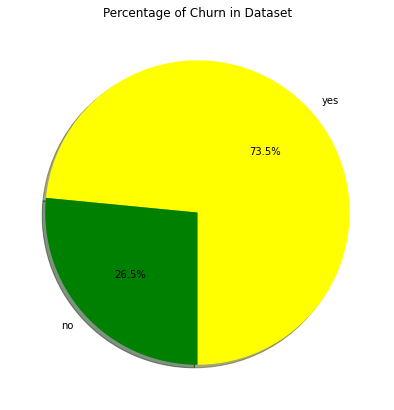

In [16]:
sizes = df['Churn'].value_counts(sort = True)
colors = ["yellow","green"]
labels = ["yes","no"]
plt.figure(figsize=(7,7))
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

In [17]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Correlation 

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102395
tenure               0.016567  1.000000        0.247900      0.824757
MonthlyCharges       0.220173  0.247900        1.000000      0.650468
TotalCharges         0.102395  0.824757        0.650468      1.000000


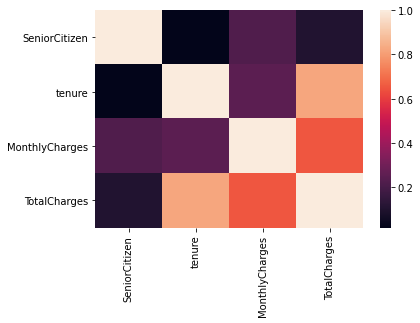

In [18]:
corr = df[continuous_var].corr()
print(corr)
sns.heatmap(corr)

We can say that the variable TotalCharges and tenure are highly positively correlated.

Employment Contract

In [19]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

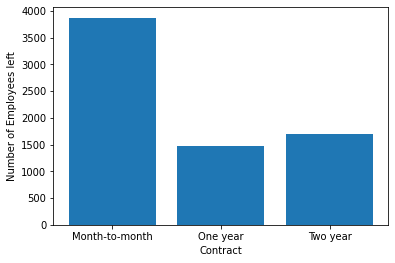

In [20]:
cont=df.groupby('Contract').count()
plt.bar(cont.index.values, cont['Churn'])
plt.xlabel('Contract')
plt.ylabel('Number of Employees left')
plt.show()

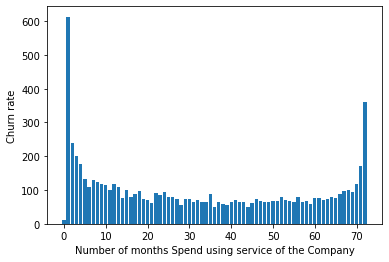

In [21]:
tenure=df.groupby('tenure').count()
plt.bar(tenure.index.values, tenure['Churn'])
plt.xlabel('Number of months Spend using service of the Company')
plt.ylabel('Churn rate')
plt.show()

Subplots

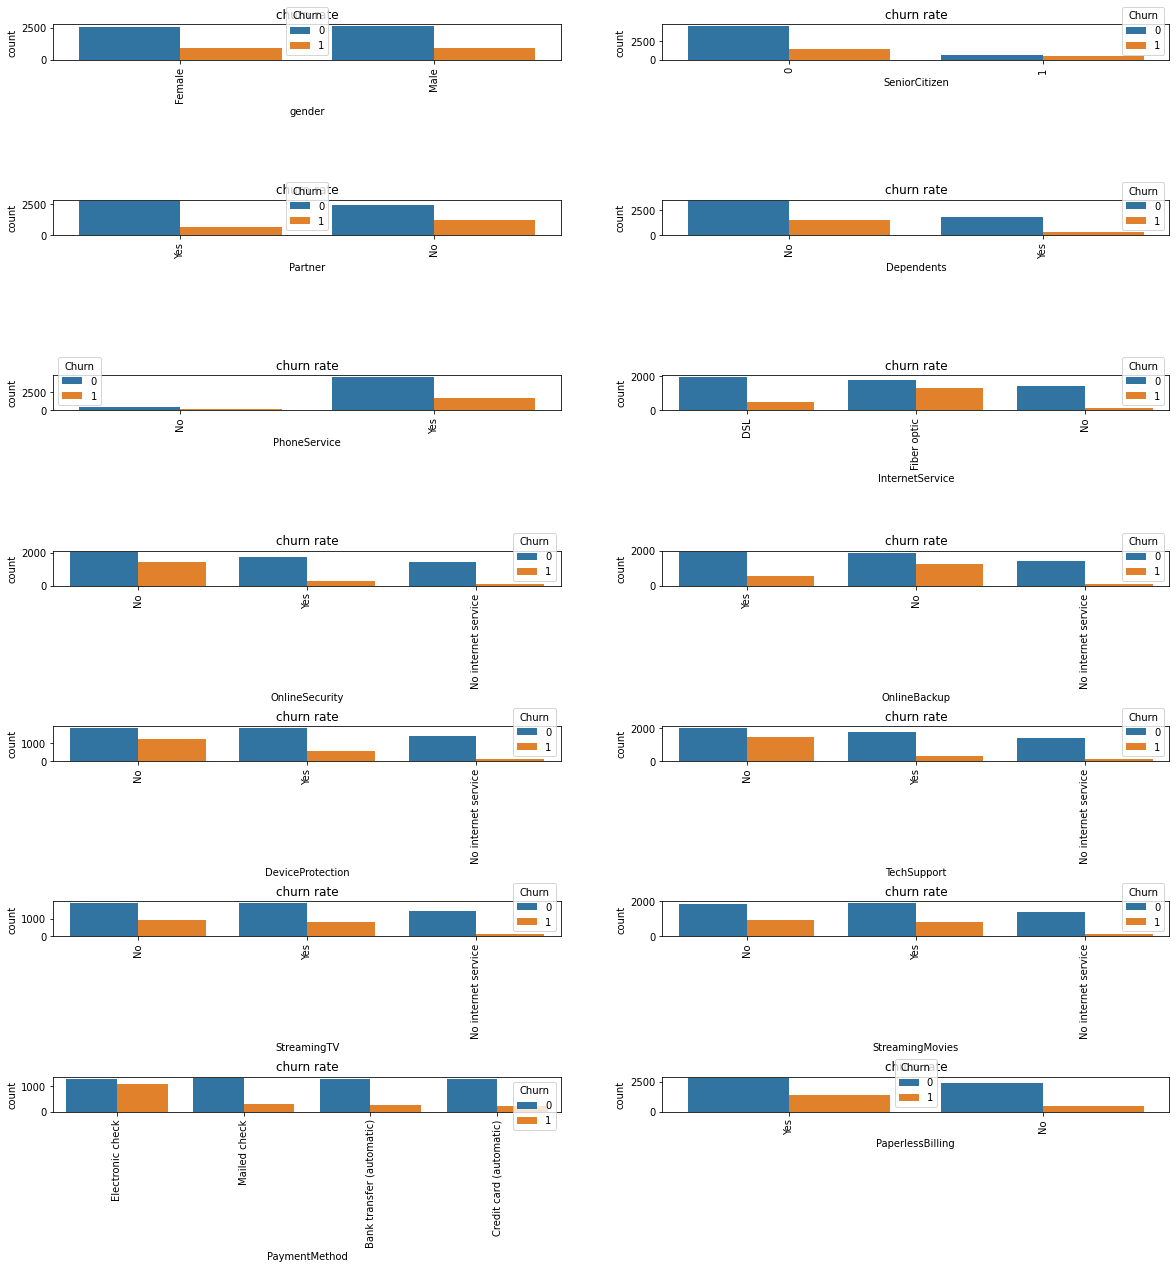

In [22]:
features=['gender','SeniorCitizen','Partner','Dependents','PhoneService', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaymentMethod','PaperlessBilling']
fig=plt.subplots(figsize=(20,20))
for i, j in enumerate(features):
    plt.subplot(7, 2, i+1)
    plt.subplots_adjust(hspace = 4)
    sns.countplot(x=j,data = df, hue= 'Churn')
    plt.xticks(rotation=90)
    plt.title("churn rate")

**Following are the insights from the EDA performed:**

1. Gender :  Both Male and Female have identical
churn rate.
2. Partner : Customers with No partners are
more prone to churning.
3. Dependents : Customers with No dependents are more prone to churning.
4. Phone Service : Customers both using/not using phone service have identical churn rate.
5.Internet Service : Customers using Fibre optics are more prone to churning.
6. Muliple Lines :  Identical churn rates for the different categories of multiple lines.
7. Online Security : Most of the customers not opting for online security churn.
8. Online Backup : Most of the customers not opting online backup churn.
9.Streaming TV : Nearly equal churn rate of customers who opt or do not opt for streaming TV.
10.Streaming Movies :Nearly equal churn rate of customers who opt or do not opt for streaming Movies.
12.Tech Support : Most of the customers who do not have tech support churn away.
13. Contract : Most of the customers going for month-to-month contract churn away.
14.Paperless Billing :  Most of the customers are going for Paperless billing churn.
15.Payment Method : Most of the customers opting for electronic check churn.
16. Senior Citizen : SeniorCitizens are more likely to churning.




















# **Applying various ML Models**

##### Preprocessing

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
features=['gender','SeniorCitizen','Partner','Dependents', 'PhoneService','MultipleLines', 'PaperlessBilling',
          'InternetService','OnlineSecurity','OnlineBackup',
          'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaymentMethod','Contract','MonthlyCharges','TotalCharges']
for i, j in enumerate(features):
  df[j]=le.fit_transform(df[j])
df['Churn']=le.fit_transform(df['Churn'])

##### Training the Dataset

In [24]:
X=df.drop(['Churn', 'customerID','gender','StreamingTV','StreamingMovies'],axis=1)
y=df['Churn']

In [25]:
X

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,0,0,0,0,2,0,0,0,1,2,142,74
1,0,0,0,34,1,0,0,2,0,2,0,1,0,3,498,3624
2,0,0,0,2,1,0,0,2,2,0,0,0,1,3,436,536
3,0,0,0,45,0,0,0,2,0,2,2,1,0,0,266,3570
4,0,0,0,2,1,0,1,0,0,0,0,0,1,2,729,674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,0,2,0,2,2,1,1,3,991,3700
7039,0,1,1,72,1,1,1,0,2,2,0,1,1,1,1340,6305
7040,0,1,1,11,0,0,0,2,0,0,0,0,1,2,137,1265
7041,1,1,0,4,1,1,1,0,0,0,0,0,1,3,795,1157


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Logistic Regresion**

In [27]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='liblinear', max_iter=9000)

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

In [28]:
from sklearn import metrics

accu_lr = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accu_lr)

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8126330731014905
Precision: 0.6697819314641744
Recall: 0.5764075067024129


In [29]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[930, 106],
       [158, 215]])

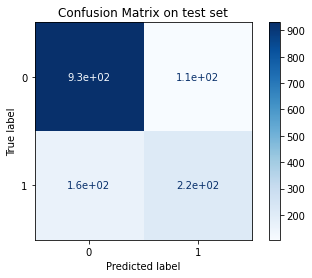

In [30]:
metrics.plot_confusion_matrix(lr_model,X_test,y_test,cmap='Blues');
plt.grid(False)
plt.title('Confusion Matrix on test set');

**Gradient Boosting Classifier**

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

accu_gb = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accu_gb)

Accuracy: 0.8055358410220014


In [32]:
cnf_matrix_gb = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix_gb

array([[941,  95],
       [179, 194]])

**Naive Bayes Classifier**

In [33]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)

accu_nb = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:",accu_nb)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

Accuracy: 0.7601135557132718
confusion matrix:
 [[786 250]
 [ 88 285]]


# **Comparing accuracies of different model**


<BarContainer object of 3 artists>

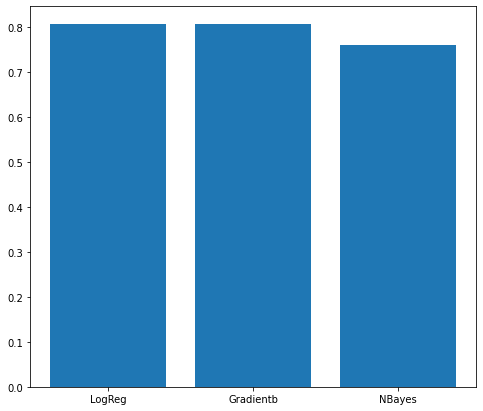

In [34]:
plt.figure(figsize= (8,7))
ac = [accu_gb,accu_gb,accu_nb]
name = ['LogReg','Gradientb','NBayes']
plt.bar(name,ac)